In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import os
import utils
grader=utils.Grader()

In [2]:
data=loadmat(os.path.join("ex3","ex3data1.mat"))

In [3]:
input_layer_size=400
num_labels=10
X,y=data["X"],data["y"].ravel()

In [4]:
y[y==10]=0
m=y.size

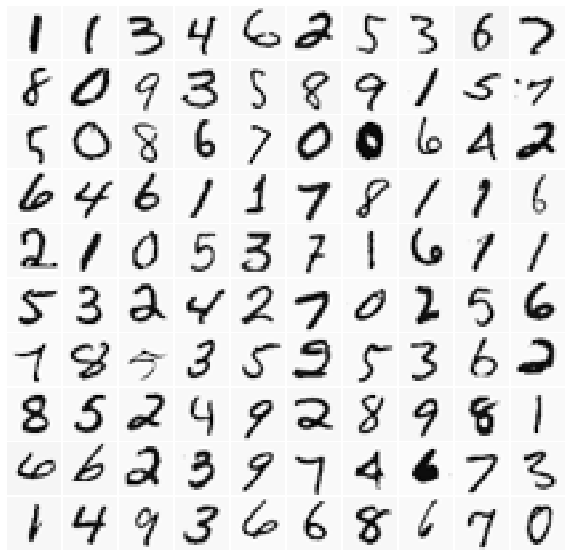

In [5]:
rand_indices=np.random.choice(m,100,replace=False)
sel=X[rand_indices,: ]
utils.displayData(sel)

In [6]:
theta_t=np.array([-2,-1,1,2],dtype=float)
X_t=np.concatenate([np.ones((5,1)),np.arange(1,16).reshape(5,3,order="F")/10.0],axis=1)
y_t=np.array([1,0,1,0,1])
lambda_t=3

In [7]:
print(X_t)
print(y_t)

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]
[1 0 1 0 1]


In [8]:
def lrCostFunction(theta,X,y,lambda_):
    m=len(y)
    J =(np.sum(-y*np.log(utils.sigmoid(np.dot(X,theta)))-(1-y)*(np.log(1-utils.sigmoid(np.dot(X,theta))))))/m+(lambda_/(2*m))*np.sum(theta**2)-(lambda_/(2*m))*theta[0]**2
    grad_0=np.sum((utils.sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m
    grad_reg=grad_0+(lambda_/m)*theta
    grad_reg[0]=grad_0[0]
    return J,grad_reg

In [9]:
def lrCostFunction1(theta,X,y,lambda_):
    m=y.size
    J=0
    if(y.dtype==bool):
        y=y.astype(int)
    
    grad=np.zeros(X.shape)
    
    h=utils.sigmoid(X.dot(theta.T))
    temp=theta
    temp[0]=0
    J=(1/m)*np.sum(-y.dot(np.log(h))-(1- y).dot(np.log(1-h))+(lambda_/(2*m))*np.sum(np.square(temp)))
    
    grad=(1/m)*(h-y).dot(X)
    
    grad=grad+(lambda_/m)*temp
    
    return J,grad
    

In [10]:
J,grad=lrCostFunction(theta_t,X_t,y_t,lambda_t)
print(J)
print(grad)

2.534819396109744
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [11]:
def fun(c,initial_theta,X,y,lambda_):
    options={"maxiter":50}
    res=optimize.minimize(lrCostFunction1,initial_theta,(X,(y==c),lambda_),jac=True,method="CG",options=options)
    cost=res.fun
    theta=res.x
    return theta

In [12]:
def oneVsAll(X,y,num_labels,lambda_):
    m,n=X.shape
    X=np.concatenate([np.ones((m,1)),X],axis=1)
    all_theta=np.zeros((num_labels,n+1))
    for c in range(num_labels):
        all_theta[c]=fun(c,all_theta[c],X,y,lambda_)
    return all_theta

In [13]:
lambda_=0.1
num_labels=10
all_theta=oneVsAll(X,y,num_labels,lambda_)

In [14]:
all_theta.shape

(10, 401)

In [15]:
def perictOneVsAll(all_theta,X):
    m=X.shape[0]
    num_labels=all_theta.shape[0]
    p=np.zeros(m)
    X=np.concatenate([np.ones((m,1)),X],axis=1)
    p=(np.argmax(utils.sigmoid(np.dot(X,all_theta.T)),axis=1))
    return p

In [16]:
predict=perictOneVsAll(all_theta,X)

In [17]:
print("Training Accuaracy",np.mean(predict==y)*100)

Training Accuaracy 95.17999999999999


In [18]:
data=loadmat(os.path.join("ex3","ex3data1.mat"))

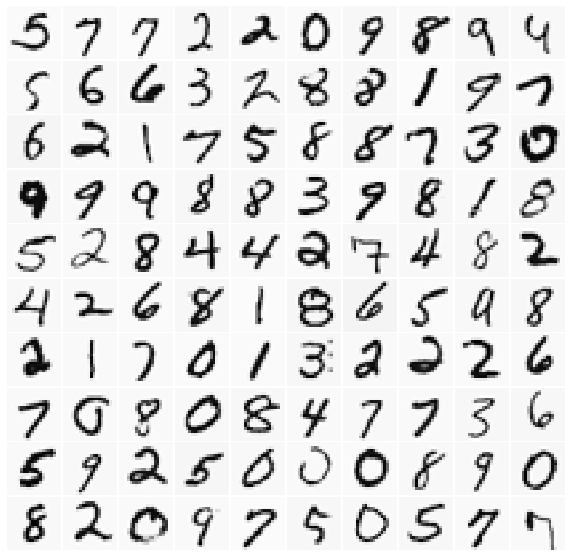

In [19]:
X,y=data["X"],data["y"].ravel()
y[y==10]=0
m=y.size
indices=np.random.permutation(m)
rand_indices=np.random.choice(m,100,replace=False)
sel=X[rand_indices ,: ]
utils.displayData(sel)

In [20]:
input_layer_size=400
hidden_layer=25
num_labels=10
weights=loadmat(os.path.join("ex3","ex3weights.mat"))
Theta1,Theta2=weights["Theta1"],weights["Theta2"]
Theta2=np.roll(Theta2,1,axis=0)

In [21]:
def predict(Theta1,Theta2,X):
    if(X.ndim==1):
        X=X[None]
    m=X.shape[0]
    num_labels=Theta2.shape[0]
    p=np.zeros(Theta2.shape[0])
    X=np.concatenate([np.ones((m,1)),X],axis=1)
    z2=np.dot(X,Theta1.T)
    a2=utils.sigmoid(z2)
    a2=np.concatenate([np.ones((a2.shape[0],1)),a2],axis=1)
    z3=np.dot(a2,Theta2.T)
    a3=utils.sigmoid(z3)
    p=np.argmax(a3,axis=1)
    return p

In [22]:
pred=predict(Theta1,Theta2,X)
print(np.mean(pred==y)*100)

97.52


In [ ]:
"""if(indices.size>0):
    i,indices=indices[0],indices[1:]
    utils.displayData(X[i:,],figsize=((4,4)))
    pred=predict(Theta1,Theta2,X[i:,])
    print("Neural network prediction: {}".format(*pred))
else:
    print("No more images to display")"""

In [26]:
grader[1]=lrCostFunction
grader[2]=oneVsAll
grader[3]=perictOneVsAll
grader[4]=predict
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (13vijay12@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
            Regularized Logistic Regression |  30 /  30 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  20 /  20 | Nice work!
         Neural Network Prediction Function |  30 /  30 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

